# Part 2. Digit Recognition

### Using Traditional ML Classifiers (i.e. No DL)

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from sklearn.cluster import KMeans
from toolz import pipe
import pandas as pd

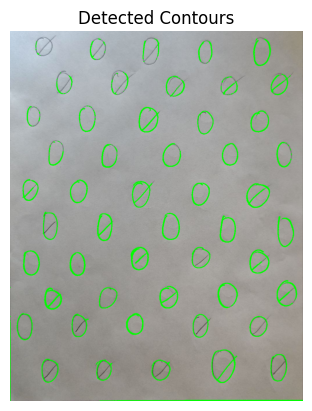

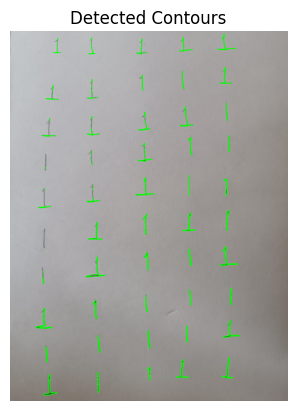

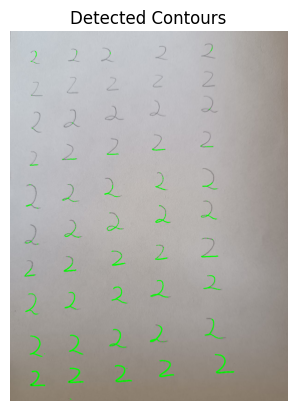

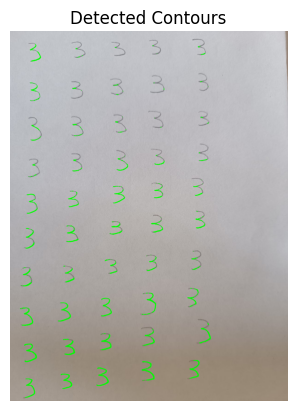

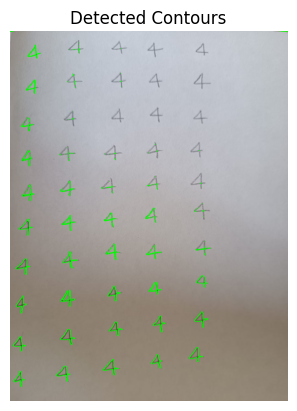

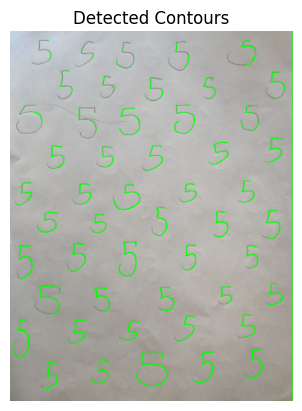

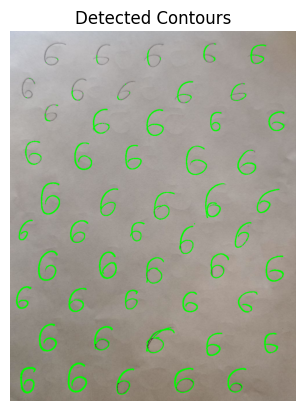

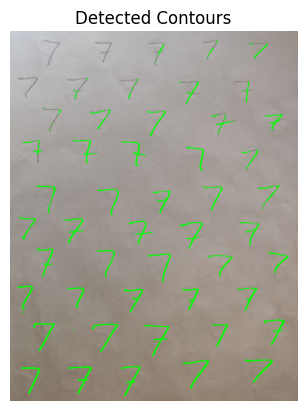

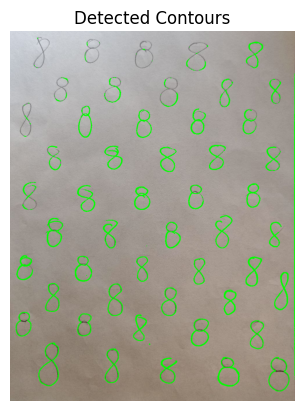

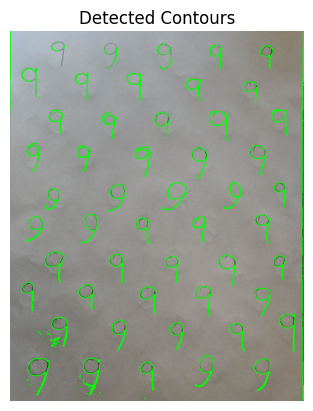

      Digit        Hu1         Hu2          Hu3          Hu4           Hu5  \
0         0  27.944347  780.854829  2200.529047  2200.339331  4.841702e+06   
1         0   0.000000    0.000000     0.000000     0.000000  0.000000e+00   
2         0   0.000000    0.000000     0.000000     0.000000  0.000000e+00   
3         0   0.000000    0.000000     0.000000     0.000000  0.000000e+00   
4         0   4.611111   20.753086     0.000686     0.000027 -3.763593e-09   
...     ...        ...         ...          ...          ...           ...   
2785      9   0.000000    0.000000     0.000000     0.000000  0.000000e+00   
2786      9   0.000000    0.000000     0.000000     0.000000  0.000000e+00   
2787      9   0.000000    0.000000     0.000000     0.000000  0.000000e+00   
2788      9  19.004174  361.130076    45.853117    45.779862  2.097472e+03   
2789      9  13.514739  182.620287     0.125705     0.125246  1.571536e-02   

               Hu6           Hu7  Euler  
0     61485.437251  6

In [85]:
def get_hu_moments(contour):
    moments = cv2.moments(contour)
    hu_moments = cv2.HuMoments(moments).flatten()
    return hu_moments

def get_euler_number(image):
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
    euler_number = num_labels - 1  # Subtract 1 for the background
    return euler_number

def extract_features_and_display(image):
    features = []
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 110, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw contours on the image
    #image_contours = image.copy()
    #cv2.drawContours(image_contours, contours, -1, (0, 255, 0), 2)
    
    #plt.imshow(cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB))
    #plt.title('Detected Contours')
    #plt.axis('off')
    #plt.show()
    
    for contour in contours:
        image_contours = image.copy()
        cv2.drawContours(image_contours, contour, -1, (0, 255, 0), 2)
    
        plt.imshow(cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB))
        plt.title('Detected Contours')
        plt.axis('off')
        plt.show()


        hu_moments = get_hu_moments(contour)
        x, y, w, h = cv2.boundingRect(contour)
        digit_image = binary[y:y+h, x:x+w]
        euler_number = get_euler_number(digit_image)
        features.append(np.append(hu_moments, euler_number))
    
    return features

def process_images_and_display(image_paths, digit_labels):
    all_features = []
    for path, digit in zip(image_paths, digit_labels):
        image = cv2.imread(path)
        features = extract_features_and_display(image)
        for feature in features:
            all_features.append([digit] + feature.tolist())
    return all_features

# Load 10 images (each containing 50 samples)
image_paths = [f"digits/{digit}.jpeg" for digit in range(10)]
digit_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]  # Assuming each image corresponds to a digit from 0 to 9

# Process the images and extract features
features = process_images_and_display(image_paths, digit_labels)

# Create a DataFrame
columns = ['Digit'] + [f'Hu{i+1}' for i in range(7)] + ['Euler']
df = pd.DataFrame(features, columns=columns)

# Save the DataFrame to a CSV file
df.to_csv('digit_features.csv', index=False)

# Output the DataFrame
print(df)


In [86]:

segmentationPipe = lambda file: pipe(
    file,
    readImage,
    kMeansSegmentation,
    extractConnectedComponents,
    computeFeatures
)

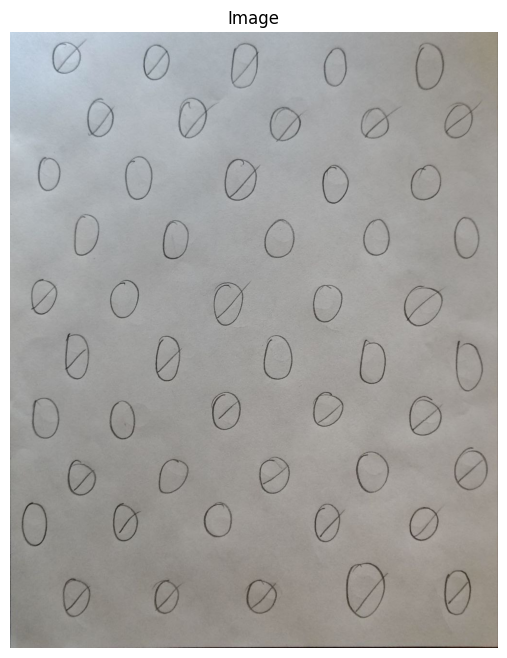

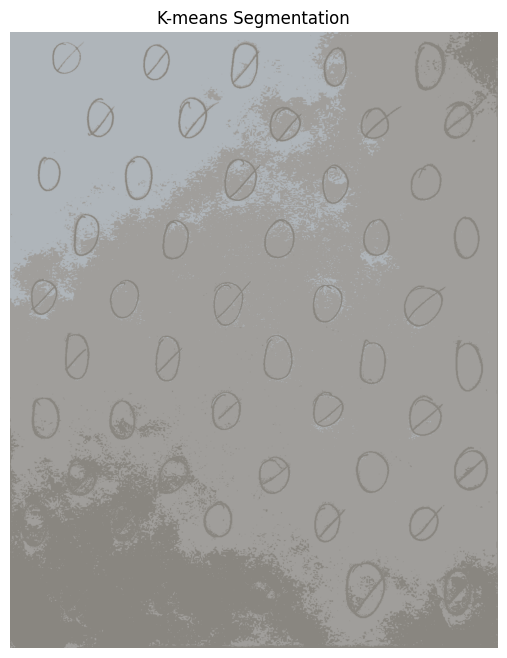

KeyboardInterrupt: 

In [87]:

segmentationPipe("digits/0.jpeg")